무작위로 은닉층 노드를 삭제 > 크기를 줄여서 훈련량이 맞추는 너낌~![alt text](image-4.png)
![alt text](image-5.png)

c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace\DL-Excersize
c:\Users\EL90\OneDrive - (주)엘릭서\MS AI 8기\수업자료\workspace
train loss:2.3127960975323387
=== epoch:1, train acc:0.13666666666666666, test acc:0.1017 ===
train loss:2.319466175333539
train loss:2.309337855985872
train loss:2.3066401048742495
=== epoch:2, train acc:0.14, test acc:0.1021 ===
train loss:2.295564229766378
train loss:2.303582799444624
train loss:2.3026834930097424
=== epoch:3, train acc:0.13666666666666666, test acc:0.1028 ===
train loss:2.297782521700952
train loss:2.2934707651106208
train loss:2.2968595217902976
=== epoch:4, train acc:0.13333333333333333, test acc:0.104 ===
train loss:2.3029389427429034
train loss:2.312223820285816
train loss:2.303781433652337
=== epoch:5, train acc:0.13333333333333333, test acc:0.1057 ===
train loss:2.30878087251011
train loss:2.3007107121990886
train loss:2.2973229441678567
=== epoch:6, train acc:0.14, test acc:0.1055 ===
train loss:2.2992971093375885
train loss:2.29655824

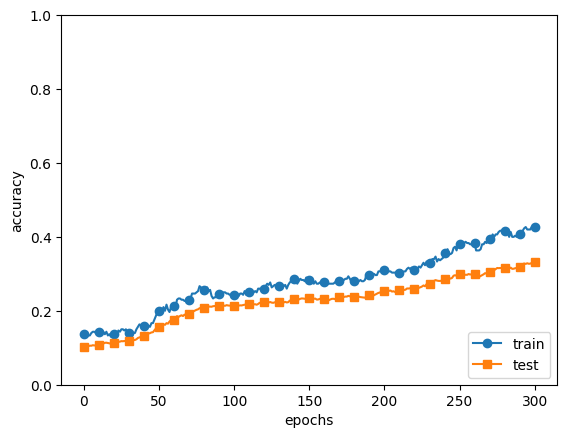

In [5]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)


#오버피팅을 재현하기 위해 학습데이터 300으로 컷
x_train = x_train[:300]
t_train = t_train[:300]


#drop out 사용 / 비율 설정 True -사용하겠다, False - 사용하지 않겠다
use_dropout = True
dropout_ratio = 0.3



network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                        output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)

trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)
#Verbose??what for? 그리고 optimizer params 는 왜 배열로 지정해줌? {} ?

#정의해준 trainer를 train 돌림. 학습! .train 이라는 메소드가 있나? Trainer에 있는 걸까?
trainer.train()  

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()





![alt text](image-6.png)
![alt text](image-7.png)